                                        IITM PRAVARTAK CAPSTONE PROJECT-5
                                           EMPLOYEE ATTRITION ANALYSIS
                                              Sirisha Rompicherla

In [18]:
# importing packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Read the data
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning and Data Preprocessing

### Treating Missing values, Constant columns, Duplicated values, columns that donot add value

In [13]:
# Understanding the data, display the data first

data.shape
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [19]:
## ---------  Identification and treatment of missing values-------------##

###  In this case, there are no null values

#data.isnull().sum()
# data.dropna()  -- For dropping missing values. In this case there are no null values
# For filling misssing values, mean or median or mode

### ----------  Duplicated values ------------  ###
#data[data.duplicated()]
# There are no duplicates in this case. If there are any, drop the duplicates
# data.drop_duplicates[keep='first']


# -------DROP CONSTANT COLUMNS (in this case, 'EmployeeCount', 'Over18', 'StandardHours') ---- ##
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
# print(constant_columns)
data=data.drop(columns=constant_columns)

# -------- DROP COLUMNS THAT DONOT ADD VALUE --here, EmployeeNumber, StockOptionLevel doesnot add any value---- ###
data=data.drop(columns=['EmployeeNumber', 'StockOptionLevel'], axis=1)


df = pd.DataFrame(data)

### Encoding the Non-Numerical Columns of Data

#### To understand correlation between Attrition and the rest of the features, observing the correlation matrix


In [21]:
#  Binary : Attrition, Gender, Overtime ---  Convert them to True or Flase
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
if 'OverTime' in df.columns:
    df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
#df.Attrition.value_counts()

#  Categorical Data columns are converted to Numerical using One hot Encoding
#  One hot Coding is done for the columns : BusinessTravel, Department, EducationField, MaritalStaus

if 'BusinessTravel' in df.columns:
    df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
if 'Department' in df.columns:
    df = df.join(pd.get_dummies(df['Department'], prefix='Department')).drop('Department', axis=1)
if 'EducationField' in df.columns:
    df = df.join(pd.get_dummies(df['EducationField'], prefix='Education')).drop('EducationField', axis=1)
if 'MaritalStatus' in df.columns:
    df = df.join(pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')).drop('MaritalStatus', axis=1)
if 'JobRole' in df.columns:
    df = df.join(pd.get_dummies(df['JobRole'], prefix='JobRole')).drop('JobRole', axis=1)

# Convert Boolean values to Numerical

df = df.map(lambda x: 1 if x is True else 0 if  x is False else x)

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

scaled_df

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0     0.446350        0.0   0.742527         -1.010909  -0.891688   
1     1.322365        0.0  -1.297775         -0.147150  -1.868426   
2     0.008343        0.0   1.414363         -0.887515  -0.891688   
3    -0.429664        0.0   1.461466         -0.764121   1.061787   
4    -1.086676        0.0  -0.524295         -0.887515  -1.868426   
5    -0.539166        0.0   0.502054         -0.887515  -0.891688   
6     2.417384        0.0   1.292887         -0.764121   0.085049   
7    -0.758170        0.0   1.377177          1.827158  -1.868426   
8     0.117845        0.0  -1.453958          1.703764   0.085049   
9    -0.101159        0.0   1.230910          2.197341   0.085049   
10   -0.210661        0.0   0.016150          0.840004   0.085049   
11   -0.867672        0.0  -1.610141          0.716610  -0.891688   
12   -0.648668        0.0  -0.328446          2.073946  -1.868426   
13   -0.320163        0.0   1.347427          1.210187  -0.891688   
14   -0.977174        0.0  -1.734097          1.827158   0.085049   
15   -0.867672        0.0   1.454029          1.456975   1.061787   
16   -0.539166        0.0  -1.161424         -0.517332  -0.891688   
17   -1.634185        0.0   0.794588          0.840004  -0.891688   
18    1.760373        0.0   1.032581         -0.887515   1.061787   
19    0.117845        0.0  -1.069697         -0.887515   0.085049   
20   -1.415181        0.0  -0.321008          0.223033  -0.891688   
21   -0.101159        0.0   1.030102         -0.023755   1.061787   
22   -0.320163        0.0  -0.950700         -0.270544   1.061787   
23   -1.743687        0.0  -1.020115          0.716610  -0.891688   
24   -0.320163        0.0  -0.256552         -0.393938  -1.868426   
25    1.760373        0.0   1.188765         -0.517332   0.085049   
26   -0.539166        0.0   0.799546          0.840004  -1.868426   
27    0.555852        0.0  -0.276384         -0.147150   1.061787   
28    0.774856        0.0  -0.806912         -0.270544   1.061787   
29    0.993860        0.0  -0.241677         -0.887515   1.061787   
30   -0.429664        0.0   0.301246         -0.887515   0.085049   
31    0.774856        0.0   1.627566          0.099639   1.061787   
32   -0.758170        0.0  -1.679556         -0.023755  -0.891688   
33    0.227347        0.0   0.229352         -0.517332   0.085049   
34   -1.415181        0.0   0.026066         -1.010909   0.085049   
35    0.665354        0.0   1.166453         -0.887515  -0.891688   
36    1.431867        0.0   0.164896         -0.764121  -0.891688   
37   -0.210661        0.0   0.216957         -0.887515   0.085049   
38   -0.101159        0.0   0.122751         -0.517332   1.061787   
39   -0.429664        0.0   0.839212         -1.010909   0.085049   
40   -0.210661        0.0  -0.839141         -0.640727  -0.891688   
41   -1.086676        0.0   1.084643         -0.887515   1.061787   
42   -1.196177        0.0   1.374698          1.950552   0.085049   
43   -1.086676        0.0   0.474783         -0.147150   0.085049   
44   -0.758170        0.0  -0.202011         -1.010909  -0.891688   
45    0.446350        0.0   1.382135          0.346427   0.085049   
46   -0.320163        0.0   0.650800          1.703764   1.061787   
47    0.008343        0.0  -0.977970          1.210187  -0.891688   
48    0.993860        0.0   1.012749         -0.517332   1.061787   
49   -0.210661        0.0   1.057373         -0.147150  -1.868426   
50    1.212863        0.0  -0.437526         -1.010909  -0.891688   
51   -0.977174        0.0   1.565588         -0.517332   1.061787   
52    0.774856        0.0   1.699460         -1.010909   2.038524   
53   -0.210661        0.0   0.730131          0.223033  -0.891688   
54   -1.196177        0.0   1.587900          1.703764   0.085049   
55   -0.429664        0.0  -0.712706         -1.010909  -0.891688   
56   -0.210661        0.0   0.125230          1.086793   2.038524   
57   -0.2

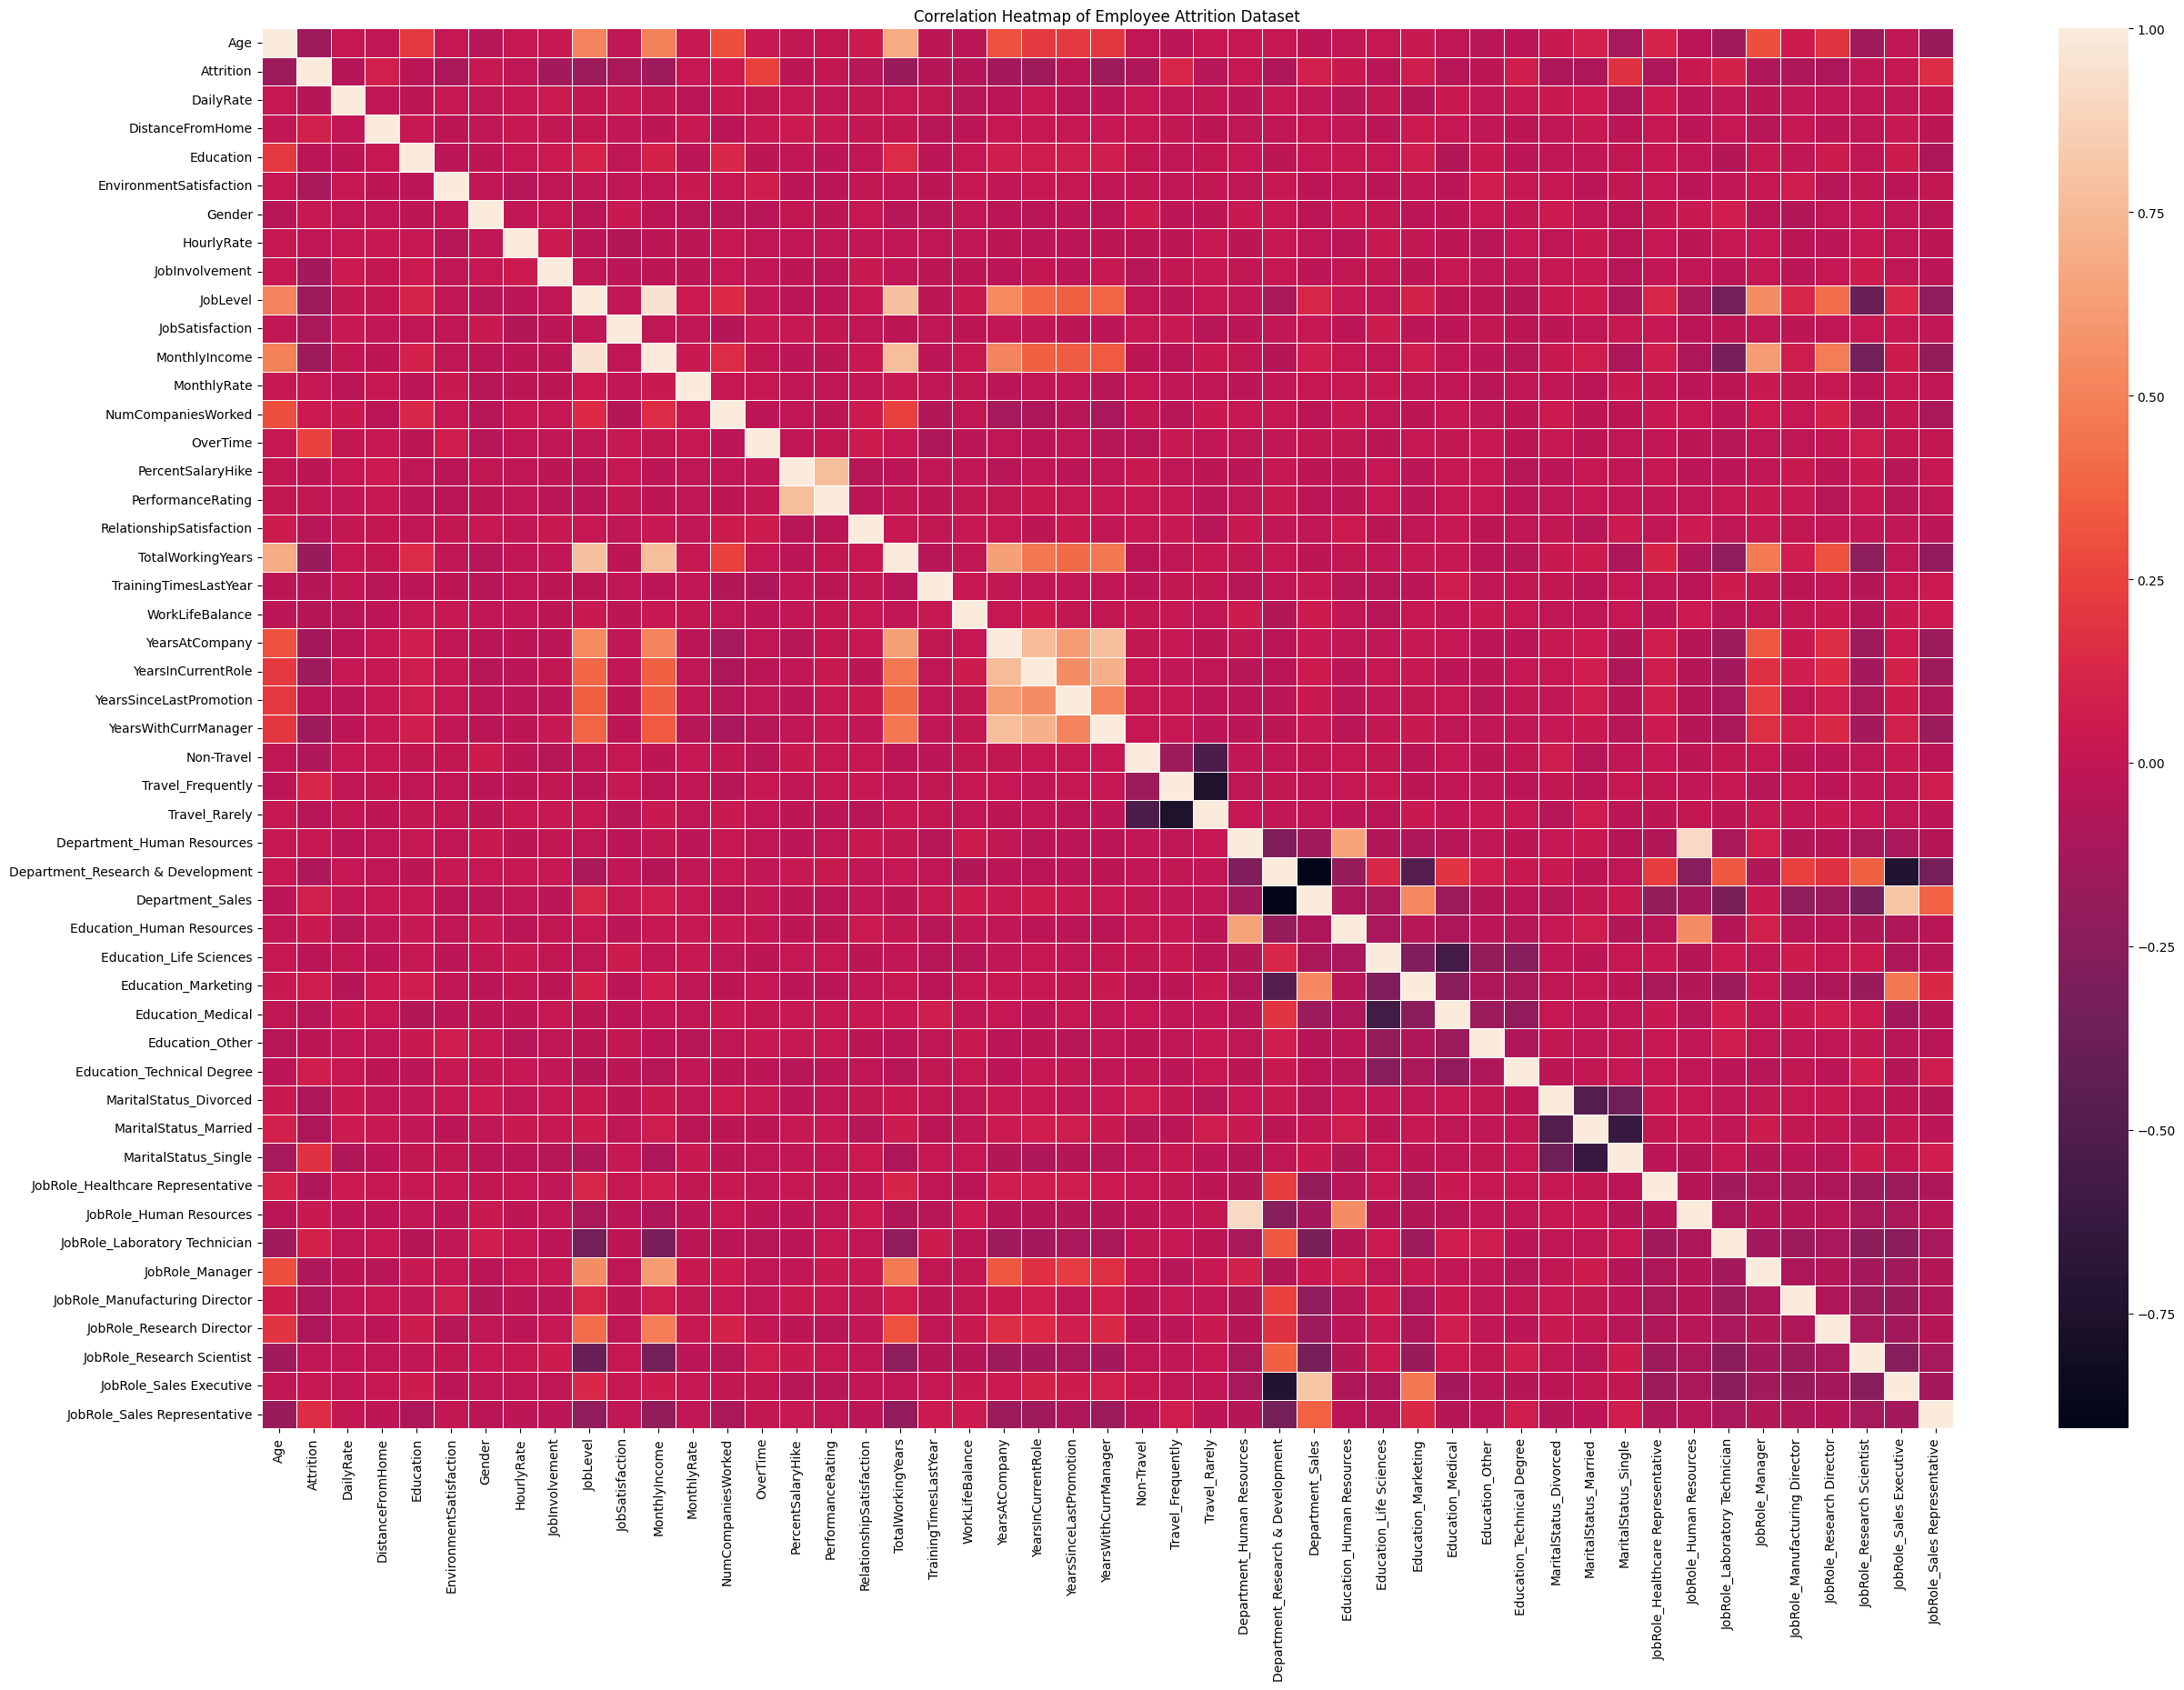

NameError: name 'correlations' is not defined

In [16]:
corr = df.corr()

plt.figure(figsize=(30, 20)) # Adjust figure size as needed
sns.heatmap(corr, annot=False, fmt=".1f", linewidths=.5)
plt.title('Correlation Heatmap of Employee Attrition Dataset')
plt.show()


# Sort by absolute correlation
sorted_corr = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Display nicely
print("Feature correlations with 'Attrition':\n")
for feature, corr in sorted_corr.items():
    print(f"{feature:<20} {corr:+.3f}")

In [ ]:
# Histogram representation of data
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

### Model Training - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

X,y = df.drop('Attrition', axis=1), df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate Accuracy
model.score(X_test, y_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary', 'macro', or 'weighted' based on the problem
print("F1 Score:", f1)

print("Classification Report : \n" ,classification_report(y_test, y_pred))

print(model.score(X_test, y_test))

## feature Importances based on random Forest Classifier

###  Data Analysis

######
Precision (for class 1) = 0.60
→ Of all predicted attrition cases, 60% were actually attrition.

Recall (for class 1) = 0.21
→ Of all actual attrition cases, the model only identified 21%.

F1 Score (for class 1) = 0.32
→ Harmonic mean of precision and recall. Low because recall is very poor.

 #### The Problem
##### High accuracy and high F1 for class 0 hides the poor performance on class 1.
##### This is common in imbalanced datasets. We know that the number of employees who left thecompany is much less than who stayed.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Split your original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Oversampling only to training data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_resampled.value_counts())

# Train on resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict on original test data
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

### Analysing Feature Importances of each Feature againt Attrition

In [ ]:
## -----------  model.feautre_importances_ gives the array of model.feature_importances_ is a NumPy array that tells you how important each feature was in making the model’s predictions.
## Here Tuples are created with featue names and  Importance
## These are sorted based on importance and plotted

important_features = dict(sorted(zip(model.feature_names_in_,model.feature_importances_),key=lambda x: x[1], reverse=True))
from collections import Counter

plt.figure(figsize=(20,8))
plt.bar(important_features.keys(),important_features.values())
plt.xticks(rotation=45, ha='right')
plt.show()

#### Resampling of Data

In [ ]:
## Using Oversampling of Data. Undersampling causes loss of data as this is a small Dataset

#from collections import Counter
#from imblearn.over_sampling import RandomOverSampler

#print('Before Sampling',Counter(y))
#rus = RandomOverSampler(random_state = 42)
#X_over, y_over = rus.fit_resample(X,y)
#print('AfterSampling',Counter(y_over))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Sanity check for Data
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Plotting Confusion Matrix and Analysing

import matplotlib.pyplot as plt
from sklearn import metrics
fig = plt.figure(figsize = (9,9))

prediction = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test,prediction)
# plt = sns.heatmap(pd.DataFrame(cnfsn_matrix), annot = True)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [ ]:
#  Accuracy : How frequently model is correct

print("Accuracy Score i.e, how oftern model is correct : " , accuracy_score(y_test , prediction))


In [ ]:
# Precision :  Of all positives predicted, how many are truly positve

print("Precision is : ", metrics.precision_score(y_test,prediction))

In [ ]:
# Sensitivity - -Höw well model is predicting Positive values

print("Sensitivity_recall is :" , metrics.recall_score(y_test,prediction))

In [ ]:
# F Score - "harmonic mean" of precision and sensitivity
print("F_score :", metrics.f1_score(y_test,prediction))

## Clustering

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
## As it is observed from above Feature-Importances , consider the top 3 features for clustering

###  MonthlyIncome, Age, DailyRate and Overtime

df_selected = scaled_df[['Attrition','OverTime', 'MonthlyIncome', 'JobSatisfaction']]

In [ ]:
### Choosing the number of Clusters
### wcss - Within Clusters Sum of Squares

wcss = []

for i in range(1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow point graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### The Optimum number of clusters is 5

### Training the KMeans clustering Model

#####  Using PCA dimensionality reduction to be done

In [ ]:

# Step 4: Feature scaling
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(df_selected)

# Step 5: Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 6: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 7: Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### EDA

#### Rating Features Analysis

JobSatisfaction   
EnvironmentSatisfaction     
RelationshipSatisfaction  
WorkLifeBalance  
PerformanceRating  
JobInvolvement  



## ANALYSING FOR BUSINESS PURPOSE

In [ ]:
df = data
df.head(10)
df.tail(10)

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

labels = 'Low', 'Medium', 'High', 'VeryHigh'

data['JobSatisfaction'].astype(str).value_counts().plot(kind= 'pie', autopct='%1.1f%%', figsize=(15,16), startangle=90, label=None, ax=ax1)
ax1.set_title('Rating of JobSatisfation of Employees')

data['JobInvolvement'].astype(str).value_counts().plot(kind= 'pie', autopct='%1.1f%%', figsize=(15,16), startangle=90, label=None, ax=ax2)
ax3.set_title('Rating of JobInvovement of Employees')

data['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind= 'pie', autopct='%1.1f%%', figsize=(15,16), startangle=90, label=None, ax=ax3)
ax4.set_title('Rating of Environment Satisfation')

data['RelationshipSatisfaction'].astype(str).value_counts().plot(kind= 'pie', autopct='%1.1f%%', figsize=(15,16), startangle=90, label=None, ax=ax4)
ax4.set_title('Rating of Relationship Satisfaction')

fig.legend(labels=labels, loc='center')

plt.tight_layout()
plt.show()

In [ ]:
fig=plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

labels = 'Low', 'Medium', 'High', 'VeryHigh'

data['WorkLifeBalance'].astype(str).value_counts().plot(kind= 'pie', autopct='%1.1f%%', figsize=(15,16), startangle=90, label=None, ax=ax1)
ax1.set_title('Rating of Work Life Balance by Employees')

data['PerformanceRating'].astype(str).value_counts().plot(kind= 'pie', autopct='%1.1f%%', figsize=(15,16), startangle=90, label=None, ax=ax2)
ax2.set_title('Performance Rating')

fig.legend(labels= labels, loc= 'right')
plt.show()

### Morethan 60% Employees felt that the work life balance is poor. The HR or Management would want to look into this and check if there is high level of overtime being recorded. If necessary, compensation leaves or Incentives for Overtime to be arranged.
### Performance rating of 84% of Employees is Low

### DEPARTMENT WISE

In [ ]:
dept = data[['Department', 'Attrition']]
dept['Department'].value_counts()

In [ ]:
dept['Department'].value_counts().plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=90, labels=None)
plt.axis('equal')
plt.legend(labels = dept['Department'].unique(), loc='upper left')

### Attrition is high in Sales Department. The reasons are to be figured out

# Analysis of Monthly Income

In [ ]:
print(monthly_income)

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Q1 in the Box plot shows that Employee Attrition is high in the group where income is Low.
### However, there are Outliers in the group as well. i.e there are employees of High income group who left the company. So, measures are to be taken to understand the reasons other than Income

In [ ]:

# Create a count plot to visualize the impact of OverTime on Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Impact of OverTime on Attrition')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')

### From above plot, it is clear that the number of employees who left the company is high if they did over time